In [62]:
# First thing we do is import the packages that we need for this example
from AWNPy import AWN, AWNPyError
from datetime import datetime

In [34]:
# Create an instance of AWN
m = AWN(username='UN', password='PW')

In [32]:
# Retrieving metadata metadata
metadata = m.metadata()
metadata_df = m.metadata(return_dataframe=True)

In [37]:
# Take a look at the metadata (add a semicolon to hide the output)
metadata;
metadata_df;

In [50]:
# some examples of subdividing data
# See stations in King County only
metadata_df[metadata_df['COUNTY'] == 'King'];
# See stations with names containing the name "Lynden"
metadata_df[metadata_df['STATION_NAME'].str.contains('Lynden')];

In [151]:
# accessing data
# first we need to define a start/end time for the data, otherwise the API call will time out
start = datetime(2020, 6, 20, 10)
end = datetime(2020, 6, 24, 10)
data = m.stationdata(STATION_ID='330092', START=start, END=end, return_dataframe=True)

In [74]:
# If we don't specify anything, we get the most recent observations for ALL stations in a dictionary
data = m.stationdata(return_dataframe=True)

In [83]:
# saving data
data = m.stationdata(STATION_ID='330092', START=start, END=end, return_dataframe=True)
data.to_csv('/Users/joejoezz/Downloads/data.csv')

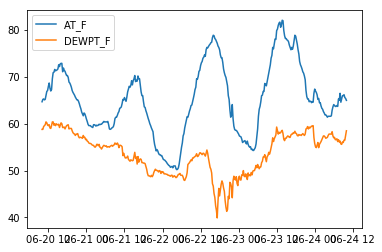

In [154]:
# visualizing data
# print(data.columns)
data.sort_index(inplace=True) # this is a bug fix--disregard

import matplotlib.pyplot as plt
plt.plot(data.index, data['AT_F'].astype('float'))
plt.plot(data.index, data['DEWPT_F'].astype('float'))
plt.legend()

In [155]:
# unfinished stuff below...


# some examples of subdividing data -- lets get a bigger dataset
start = datetime(2020, 1, 1, 0)
end = datetime(2020, 6, 24, 10)
data = m.stationdata(STATION_ID='330092', START=start, END=end, return_dataframe=True)
air_t = data['AT_F']